In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

path='LogiReg_data.txt'
pdData=pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])

In [39]:
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
pdData.shape


(100, 3)

In [5]:
positive=pdData[pdData['Admitted']==1]
negative=pdData[pdData['Admitted']==0]
positive.head()

,Exam 1,Exam 2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [6]:
negative.head()


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


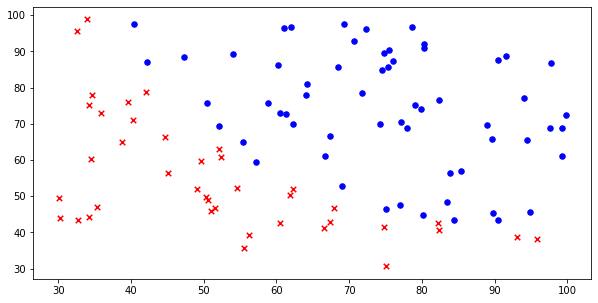

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=30,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='Not Admitted')

In [11]:
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Text(3.200000000000003, 0.5, 'Exam 2 Score')

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
nums =np.arange(-10,10,step=1)
print(nums)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


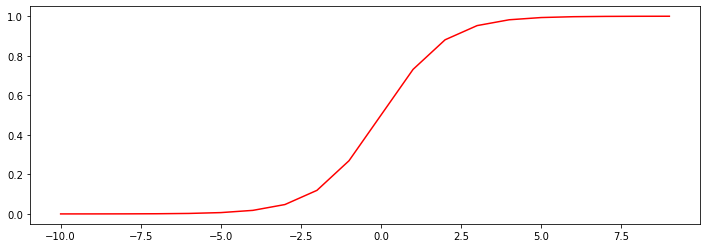

In [15]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

In [18]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))

In [40]:

pdData.insert(0,'Ones',1)
orig_data=pdData.values

In [41]:
print(type(pdData))
print(type(orig_data))
print(orig_data.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(100, 4)


In [42]:
cols=orig_data.shape[1]
X=orig_data[:,:cols-1]
y=orig_data[:,cols-1:]

In [43]:
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


In [44]:
theta=np.zeros([1,3])

In [27]:
X[:5]


array([[ 1.        ,  1.        , 34.62365962, 78.02469282],
       [ 1.        ,  1.        , 30.28671077, 43.89499752],
       [ 1.        ,  1.        , 35.84740877, 72.90219803],
       [ 1.        ,  1.        , 60.18259939, 86.3085521 ],
       [ 1.        ,  1.        , 79.03273605, 75.34437644]])

In [28]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [29]:
theta

array([[0., 0., 0.]])

In [30]:
def cost(X,y,theta):
    left=np.multiply(-y,np.log(model(X,theta)))
    right=np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right)/len(X)


In [45]:
cost(X,y,theta)

0.6931471805599453

In [60]:
def gradient(X,y,theta):
    grad=np.zeros(theta.shape)
    error=(model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:,j])
        grad[0,j]=np.sum(term)/len(X)
    return grad

In [61]:
STOP_ITER=0
STOP_COST=1
STOP_GRAD=2

    

In [62]:
def stopGriterion(type,value,threshold):
    # 设定三种不同的停止策略
    if type==STOP_ITER: return value>threshold
    elif type==STOP_COST:return abs(value[-1]-value[-2])<threshold
    elif type==STOP_GRAD:return np.linalg.norm(value)<threshold


In [63]:
def shuffleData(data):
    np.random.shuffle(data )
    cols=data.shape[1]
    X=data[:,0:cols-1]
    y=data[:,cols-1:]
    return X,y

In [64]:
n=100
import time
def descent(data,theta,batchSize,stopType,thresh,alpha):
    # 梯度下降求解
    init_time=time.time()
    i=0#迭代次数 
    k=0 # batch
    X,y=shuffleData(data)
    grad=np.zeros(theta.shape)
    costs=[cost(X,y,theta)]
    while True:
        grad=gradient(X[k:k+batchSize],y[k:k+batchSize],theta)
        k+=batchSize
        if k>=n:
            k=0
            X,y=shuffleData(data)
        theta=theta-alpha*grad
        costs.append(cost(X,y,theta))
        i+=1
        if stopType==STOP_ITER:value=i
        elif stopType==STOP_COST:value=costs
        elif stopType==STOP_GRAD:value=grad
        if stopGriterion(stopType,value,thresh):break
    return theta,i-1,costs,grad,time.time()-init_time

In [67]:
def runExpe(data,theta,batchsize,stopType,thresh,alpha):
    theta,iter,costs,grad,dur=descent(data,theta,batchsize,stopType,thresh,alpha)
    name='Original ' if (data[:,1]>2).sum()>1 else "Scaled"
    name+=' data  - learning rate :{} - '.format(alpha )
    if batchsize==n:strDescType='Gradient'
    elif batchsize==1:strDescType='Stochastic'
    else:strDescType='Mini - batch ({})'.format(batchsize)
    name+=strDescType+"descent - Stop :"
    if stopType==STOP_ITER:strStop="{} iterations".format(thresh)
    elif stopType==STOP_COST:strStop="costs change<{}".format(thresh)
    else:strStop='gradient norm <{}'.format(thresh)
    name+=strStop
    print('****{}\n Theta: {}-Iter: {} - last cost: {:03.2f} - Duration:{:03.2f}s'.format(name,theta,iter,costs[-1],dur))
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,'r')
    ax.set_xlabel('Iterations ')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper()+' - Error vs. Iteration ')
    return theta

****Original  data  - learning rate :1e-06 - Gradientdescent - Stop :5000 iterations
 Theta: [[-0.00027127  0.00705232  0.00376711]]-Iter: 5000 - last cost: 0.63 - Duration:1.66s


array([[-0.00027127,  0.00705232,  0.00376711]])

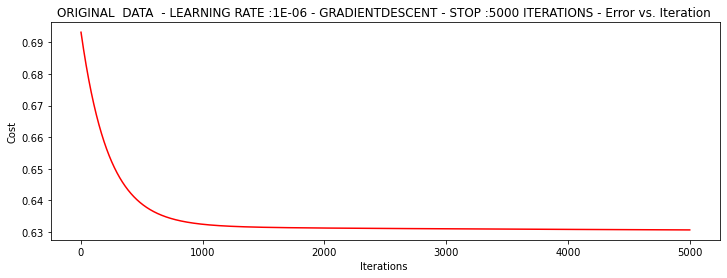

In [68]:
# 选择的梯度下降方法是基于所有样本的 
runExpe(orig_data,theta,n,STOP_ITER,thresh=5000,alpha=0.000001)